# DSDJ Technical Workshop | Hierarchical Clustering

## Identifying Consumer Behavior
***

The dataset that we'll be working with contains 200 customer data. We are going to be focusing on their annual income vs spending behavior and our goal is to identify groups of customers.

## Import Necessary Libraries

In [33]:
__author__ = "Data Science Dream Job"
__copyright__ = "Copyright 2019, Data Science Dream Job LLC"
__email__ = "info@datasciencedreamjob.com"


# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Import Customers Dataset

In [34]:
# Importing the dataset
df = pd.read_csv('customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Shape of dataset**

In [37]:
print ("The Shape of our dataset is: " + str(df.shape))

The Shape of our dataset is: (200, 5)


## Get a subset of the data

In [8]:
# Create new dataframe of annual income and spending score
X_spend = df[['Annual Income (k$)','Spending Score (1-100)']]
X_spend.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Dendogram - Finding Optimal Number of Clusters

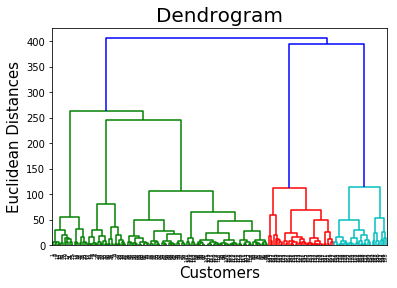

In [39]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as hcd
dendrogram = hcd.dendrogram(hcd.linkage(X_spend, metric='euclidean', method = 'ward'))
plt.title('Dendrogram', size=20)
plt.xlabel('Customers', size=15)
plt.ylabel('Euclidean Distances', size=15)
plt.show()

## Apply Agglomerative Clustering

### n_clusters = 3
***


In [40]:
# Fitting Hierarchical Clustering with 3 Clusters to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
X_spend['Cluster'] = hc.fit_predict(X_spend)

In [41]:
# Examine new dataframe with cluster column
X_spend.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,0
1,15,81,0
2,16,6,0
3,16,77,0
4,17,40,0


## Visualizing the Clusters 
***

Let's use the default cluster size provided by the dendogram and see what clusters of consumers we can identify. 

**Is it the correct choice?**

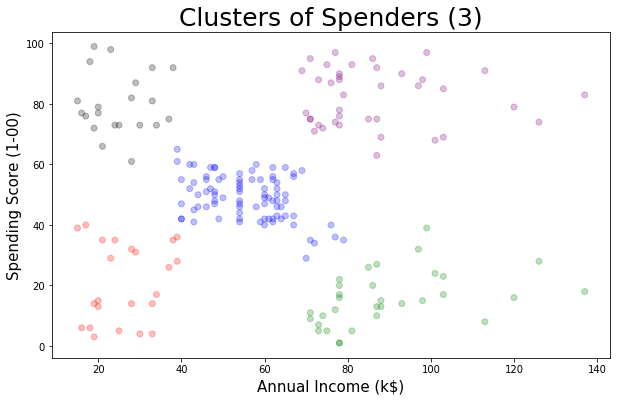

In [45]:
# Define cluster colors
hc_colors = ['green' if c == 0 else 'blue' if c == 1 else 'purple' if c == 2 else 'black' if c == 3 else 'red' for c in X_spend.Cluster]

# Plot the scatter plot & clusters
fig = plt.figure(figsize=(10, 6))
plt.scatter(x="Annual Income (k$)",y="Spending Score (1-100)", data=X_spend, alpha=0.25, color = hc_colors)
plt.xlabel("Annual Income (k$)", size=15)
plt.ylabel("Spending Score (1-00)", size=15)
plt.title("Clusters of Spenders (3)", size=25)
plt.show()

## Apply Agglomerative Clustering

### n_clusters = 5
***

In [43]:
# Fitting Hierarchical Clustering with 5 Clusters to the dataset
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
X_spend['Cluster'] = hc.fit_predict(X_spend)

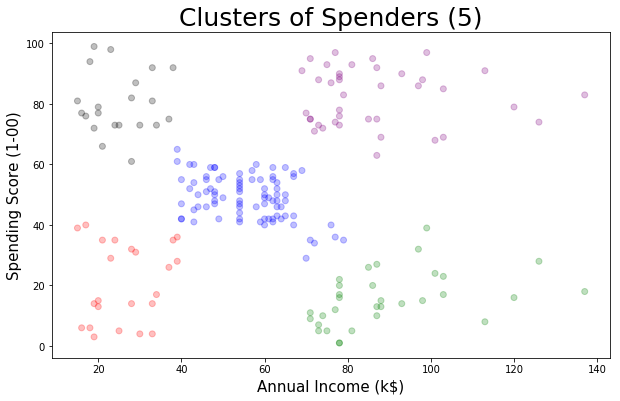

In [52]:
# Define cluster colors
hc_colors = ['green' if c == 0 else 'blue' if c == 1 else 'purple' if c == 2 else 'black' if c == 3 else 'red' for c in X_spend.Cluster]

# Plot the scatter plot & clusters
fig = plt.figure(figsize=(10, 6))
plt.scatter(x="Annual Income (k$)",y="Spending Score (1-100)", data=X_spend, alpha=0.25, color = hc_colors)
plt.xlabel("Annual Income (k$)", size=15)
plt.ylabel("Spending Score (1-00)", size=15)
plt.title("Clusters of Spenders (5)", size=25)
plt.show()

## Summary and Speculations
***

It looks like the cluster count of 5 seems a bit more reasonable.

**Our customers can be seen as:**
1. People who are earning less that are spending less
2. People who are earning less are spending more
3. People who earn an average amount and are spending an average amount
4. People who earn more and are spending less
5. People who earn more and spending more

We can now use these insights to do a deeper dive into these clusters and really understand our consumers. 

**Questions like:**
- What types of people make people spend less, but still spend more?
- Where do these types of customers spend their money at? 
- Can we target these groups of customers with tailored advertisements on specific stores they shop at?
- What types of people make rich people spend not a lot?
- For the people that spend a lot of money but spend less, where do they actually spend their money? 

### Example

Looks like the group of people who have high spending habits and also don't earn as much are the **young adults (median age - 22)**

In [65]:
# Examine Black Cluster Age Demographics
df['cluster'] = X_spend['Cluster']
df[df['cluster']==3].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
count,21.000000,21.000000,21.000000,21.000000,21.0
mean,22.000000,25.333333,25.095238,80.047619,3.0
std,12.409674,5.378971,7.133756,10.249274,0.0
min,2.000000,18.000000,15.000000,61.000000,3.0
25%,12.000000,21.000000,19.000000,73.000000,3.0
50%,22.000000,23.000000,24.000000,77.000000,3.0
75%,32.000000,30.000000,30.000000,87.000000,3.0
max,42.000000,35.000000,38.000000,99.000000,3.0
